In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('D:\\titanic\\train.csv')

np.set_printoptions(threshold=np.inf) # unfold the display result of array
pd.options.display.max_columns = None # unfold the display result of DataFarme

import warnings
warnings.filterwarnings('ignore')

In [57]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis(EDA)

  


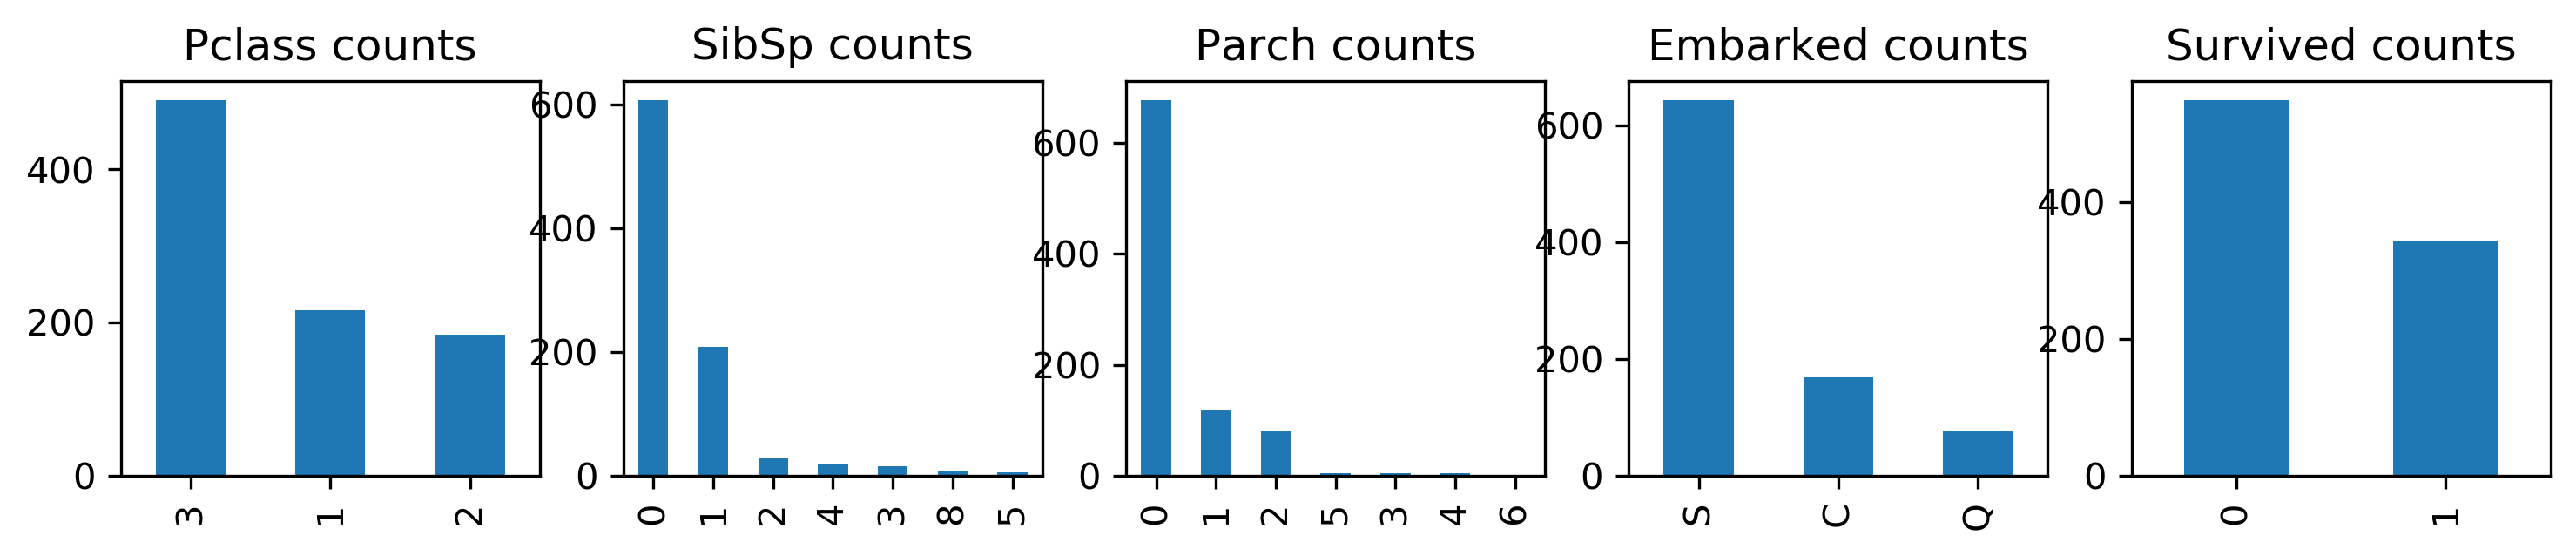

In [60]:
fig = plt.figure(figsize = (12,2))
fig.set(alpha = 0.2,dpi = 300)

def draw(feature,sub,position):
    plt.subplot2grid(sub,position)
    data[feature].value_counts().plot(kind = 'bar')
    plt.title(f'{feature} counts')

draw_fea_col = ['Pclass','SibSp','Parch','Embarked','Survived']
for i in range(len(draw_fea_col)):
    feature = draw_fea_col[i]
    sub = (1,len(draw_fea_col))
    position  = (0,i)
    draw(feature,sub,position)

Text(0.5, 1.0, 'Density of age')

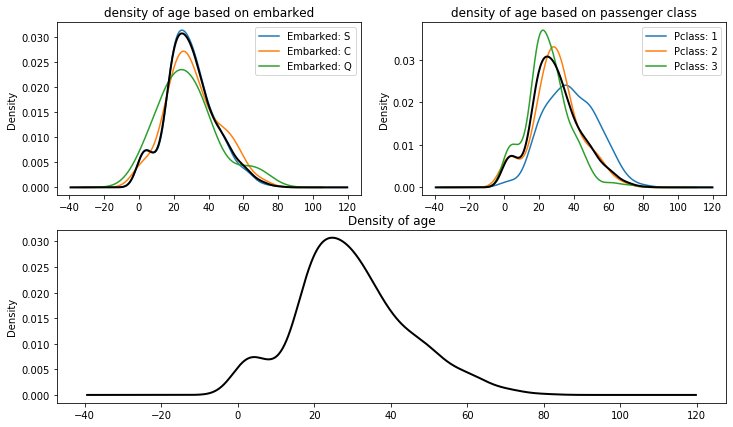

In [61]:
plt.figure(figsize = (12,7))
fig.set(dpi = 900,alpha = 0.1)

plt.subplot2grid((2,2),(0,0))
data.Age[data.Embarked == 'S'].plot(kind = 'kde')
data.Age[data.Embarked == 'C'].plot(kind = 'kde')
data.Age[data.Embarked == 'Q'].plot(kind = 'kde')
data.Age[data.Age.isnull() == False].plot(kind = 'kde',color = 'Black',linewidth = 2)

plt.title('density of age based on embarked')
plt.legend([f'Embarked: {c}' for c in list('SCQ')])

plt.subplot2grid((2,2),(0,1))
data.Age[data.Pclass == 1].plot(kind = 'kde')
data.Age[data.Pclass == 2].plot(kind = 'kde')
data.Age[data.Pclass == 3].plot(kind = 'kde')
plt.title('density of age based on passenger class')
data.Age[data.Age.isnull() == False].plot(kind = 'kde',color = 'Black',linewidth = 2)

plt.legend([f'Pclass: {c}' for c in list('123')])

plt.subplot2grid((2,2),(1,0),colspan = 2)
data.Age[data.Age.isnull() == False].plot(kind = 'kde',color = 'Black',linewidth = 2)
plt.title('Density of age')

From the figures, which is the density of the age distribute based on passenger class selection, we can conclude that the age seems to a negtive correlation with passenger class. "More money, more chance", which is true..

<Figure size 864x288 with 0 Axes>

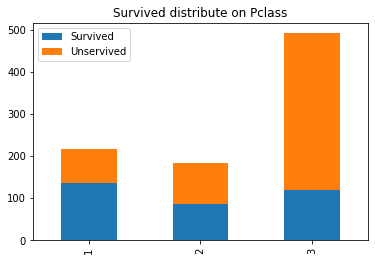

In [62]:
plt.figure(figsize = (12,4))
fig.set(alpha = 0.2,dpi = 800)

ser = data.Pclass[data.Survived == 1].value_counts()
unser = data.Pclass[data.Survived == 0].value_counts()
df = pd.DataFrame({'Survived':ser,'Unservived':unser})
df.plot(kind = 'bar',stacked = True)
plt.title('Survived distribute on Pclass')
plt.show()

Clearly high level passenger get more survived chance, that require us to set a weight for passenger class

<Figure size 864x288 with 0 Axes>

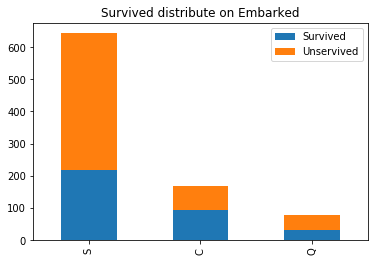

In [63]:
plt.figure(figsize = (12,4))
fig.set(alpha = 0.2,dpi = 800)
    
ser = data.Embarked[data.Survived == 1].value_counts()
unser = data.Embarked[data.Survived == 0].value_counts()
df = pd.DataFrame({'Survived':ser,'Unservived':unser})
df.plot(kind = 'bar',stacked = True)
plt.title('Survived distribute on Embarked')
plt.show()

Seems Embarked does not influence the Survived condtion.

<Figure size 864x288 with 0 Axes>

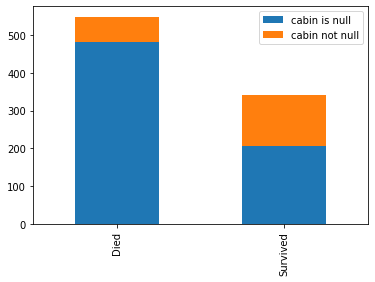

In [64]:
plt.figure(figsize = (12,4))
fig.set(alpha = 0.2,dpi = 800)

n = data.Survived[pd.isnull(data.Cabin)].value_counts()
un = data.Survived[pd.notnull(data.Cabin)].value_counts()
pd.DataFrame({'survived':n,'unsurvived':un}).plot(kind = 'bar',stacked = True)
plt.xticks([0,1],['Died','Survived'])
plt.legend(('cabin is null','cabin not null'))

Humm...

<Figure size 864x288 with 0 Axes>

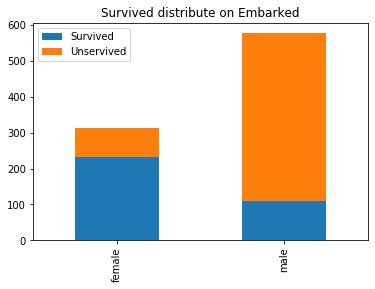

In [65]:
plt.figure(figsize = (12,4))
fig.set(alpha = 0.2,dpi = 800)


ser = data.Sex[data.Survived == 1].value_counts()
unser = data.Sex[data.Survived == 0].value_counts()
df = pd.DataFrame({'Survived':ser,'Unservived':unser})
df.plot(kind = 'bar',stacked = True)
plt.title('Survived distribute on Embarked')
plt.show()

Women have more chance to survive than man clearly.

Text(0.5, 1.0, 'distribution of Survive condtion amony different age peirod')

<Figure size 8400x1400 with 0 Axes>

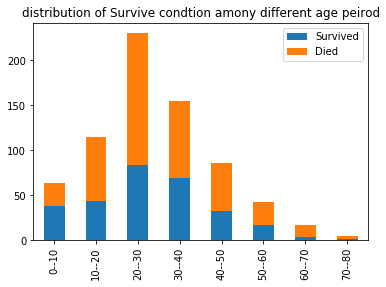

In [66]:
d = {'Survived':{},'Died':{}}
scaler = [0,10,20,30,40,50,60,70,80]
for i in range(len(scaler)-1):
    a = scaler[i]
    b = scaler[i + 1]
    d['Survived'][f"{a}--{b}"] = len(data.Survived[(data.Age <= b)&(data.Age > a)&(data.Age.isnull() == False)&(data.Survived ==1)])
    d['Died'][f"{a}--{b}"] = len(data.Survived[(data.Age <= b)&(data.Age > a)&(data.Age.isnull() == False)&(data.Survived ==0)])

fig = plt.figure(figsize = (12,2))
fig.set(alpha = 0.3,dpi = 700)
pd.DataFrame(d).plot(kind = 'bar',stacked = True)
plt.title('distribution of Survive condtion amony different age peirod')

From the photo we know that young kids hava more change to survived, which in result of that babys can get more protection. Also more protection for the old.But their body are too weak.

# Feature Enginerring

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = 1
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = 0
    return df

def get_dum(df,oh_col):
    for each in oh_col:
        m = pd.get_dummies(df[each],prefix = each)
        df = pd.concat([df.drop([each],axis = 1),m],axis = 1)
    return df

def df_drop(df,drop_col):
    return df.drop(drop_col,axis = 1)


In [70]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def fill_age(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [71]:
from sklearn.preprocessing import StandardScaler

def df_scaler(df,scaler_col):
    scaler = StandardScaler()
    m = scaler.fit_transform(df[scaler_col])
    df = pd.concat([df.drop(scaler_col,axis = 1),pd.DataFrame(m,columns = scaler_col)],axis = 1)
    return df

In [73]:
def fea_eng(df):
    df = fill_age(df)
    df = get_dum(df,oh_col)
    df = df_drop(df,drop_col)
    df = set_Cabin_type(df)
    df = df_scaler(df,scaler_col)
    return df

In [74]:

drop_col = ['Survived','Name','PassengerId','Ticket']
oh_col = ['Sex','Embarked']
scaler_col = ['Age','Fare']


data_train = fea_eng(data)

In [99]:
len(data_train) == len(data)

True

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

y = data.Survived
x = data_train.as_matrix()

xta,xts,yta,yts = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [129]:
lr = LogisticRegression(random_state = 42)
svm = SVC(probability = True,random_state = 42)
rnd = RandomForestClassifier(random_state = 42)

"""
lr.fit(xta,yta)
svm.fit(xta,yta)
rnd.fit(xta,yta)


print(lr.score(xta,yta))
print(svm.score(xta,yta))
print(rnd.score(xta,yta))

print('-----------')

"""

voting = VotingClassifier(estimators = [('lr',lr),('rnd',rnd),('svm',svm)],voting = 'soft')

In [130]:
voting.fit(xta,yta)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rnd',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

In [133]:
from sklearn.metrics import accuracy_score

for model in (lr,svm,rnd,voting):
    model.fit(xta,yta)
    y_ = model.predict(xts)
    print(model.__class__.__name__,'train',model.score(xta,yta),'test',model.score(xts,yts))

LogisticRegression train 0.7879213483146067 test 0.8324022346368715
SVC train 0.824438202247191 test 0.8491620111731844
RandomForestClassifier train 0.9747191011235955 test 0.8212290502793296
VotingClassifier train 0.8707865168539326 test 0.8491620111731844


array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [167]:
pre_data = pd.read_csv('D://titanic//test.csv')

In [168]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [169]:
drop_col = ['Name','PassengerId','Ticket']
oh_col = ['Sex','Embarked']
scaler_col = ['Age','Fare']

pre_data.loc[(pre_data.Fare.isnull()),'Fare' ] = 35.627188

data_test = fea_eng(pre_data)

In [165]:
data_test

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,3,0,0,0,0,1,0,1,0,0.367354,-0.498407
1,3,1,0,0,1,0,0,0,1,1.331798,-0.513274
2,2,0,0,0,0,1,0,1,0,2.489131,-0.465088
3,3,0,0,0,0,1,0,0,1,-0.211313,-0.483466
4,3,1,1,0,1,0,0,0,1,-0.597091,-0.418471
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,0,1,0,0,1,-0.359393,-0.494448
414,1,0,0,1,1,0,1,0,0,0.714554,1.313753
415,3,0,0,0,0,1,0,0,1,0.675976,-0.508792
416,3,0,0,0,0,1,0,0,1,-0.359393,-0.494448


In [175]:
x_test = data_test.as_matrix()
result = voting.predict(x_test)

In [176]:
result

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [180]:
import csv

with open('D:\\titanic_result.csv','w') as fw:
    cw = csv.writer(fw)
    for i in range(len(pre_data)):
        cw.writerow([pre_data.PassengerId.values[i],result[i]])

## Finally get _0.76076_ from titanic compitation.

# My Old Methods

In [136]:
drop_col = ['Cabin','PassengerId','Name','Ticket']

data1 = data.drop(drop_col,axis = 1)
data2 = data1.dropna(axis = 0)

y = data2['Survived']

beak_down_keys

NameError: name 'beak_down' is not defined

In [76]:
sex_oc = pd.get_dummies(data2['Sex'],prefix = 'Sex')
embarked_oc = pd.get_dummies(data2['Embarked'],prefix = 'Embarked')

In [77]:
data3 = data2.drop(['Sex','Embarked'],axis = 1)
data4 = pd.concat([data3,sex_oc,embarked_oc],axis = 1)

In [78]:
x = data4.drop(['Survived'],axis = 1)
y = data4['Survived']

In [79]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
svm.score(x,y)

0.9021372328458943

In [81]:
svm2 = SVC()
svm2.fit(x.drop(['Age'],axis = 1),y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
svm2.score(x.drop(['Age'],axis = 1),y)

0.8323959505061868

In [83]:
test = pd.read_csv('D:\\titanic\\test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [84]:
test1 = test.drop(['Cabin','Name','Ticket'],axis = 1)

sex_oc_t = pd.get_dummies(test1['Sex'],prefix = 'Sex')
embarked_oc_t = pd.get_dummies(test1['Embarked'],prefix = 'Embarked')

test2 = test1.drop(['Sex','Embarked'],axis = 1)
test3 = pd.concat([test2,sex_oc_t,embarked_oc_t],axis = 1)

test3['Fare'].fillna(10,inplace = True)

In [85]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [86]:
test3.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [87]:
result = {}

for i in range(len(test3)):
    each = test3.iloc[i][:]
    if np.isnan(each['Age']) == True:
        result[int(each['PassengerId'])] = svm2.predict([each.drop(['PassengerId','Age']).values])[0]
    else:
        result[int(each['PassengerId'])] = svm.predict([each.drop(['PassengerId']).values])[0]

In [88]:
print(result)

{892: 0, 893: 0, 894: 1, 895: 0, 896: 0, 897: 0, 898: 0, 899: 1, 900: 1, 901: 1, 902: 0, 903: 0, 904: 1, 905: 0, 906: 0, 907: 1, 908: 0, 909: 0, 910: 0, 911: 0, 912: 1, 913: 1, 914: 1, 915: 1, 916: 1, 917: 0, 918: 1, 919: 0, 920: 1, 921: 0, 922: 1, 923: 1, 924: 1, 925: 1, 926: 1, 927: 0, 928: 1, 929: 1, 930: 0, 931: 1, 932: 0, 933: 0, 934: 0, 935: 1, 936: 1, 937: 0, 938: 0, 939: 0, 940: 1, 941: 1, 942: 1, 943: 0, 944: 1, 945: 1, 946: 0, 947: 0, 948: 0, 949: 0, 950: 0, 951: 1, 952: 0, 953: 0, 954: 0, 955: 1, 956: 1, 957: 1, 958: 1, 959: 1, 960: 0, 961: 0, 962: 1, 963: 0, 964: 0, 965: 0, 966: 1, 967: 1, 968: 0, 969: 0, 970: 0, 971: 1, 972: 1, 973: 1, 974: 1, 975: 0, 976: 0, 977: 0, 978: 0, 979: 1, 980: 1, 981: 1, 982: 0, 983: 0, 984: 1, 985: 0, 986: 1, 987: 0, 988: 1, 989: 0, 990: 1, 991: 0, 992: 1, 993: 1, 994: 0, 995: 0, 996: 1, 997: 0, 998: 0, 999: 0, 1000: 0, 1001: 0, 1002: 0, 1003: 1, 1004: 0, 1005: 1, 1006: 1, 1007: 0, 1008: 0, 1009: 1, 1010: 1, 1011: 1, 1012: 1, 1013: 0, 1014: 1, 

In [89]:
import os
import csv

with open('D:\\result.csv','w') as fw:
    cw = csv.writer(fw)
    for each in result:
        cw.writerow([each,result[each]])

## Finally get _0.60287_ from titanic compitation. 